In [12]:
import pandas as pd 
from typing import Dict, Optional, List
from itertools import combinations
from collections import Counter
import matplotlib.pyplot as plt

In [19]:
lotto = pd.read_csv("./output/merged_lotto.csv").drop_duplicates(subset=["date"])
lotto_plus = pd.read_csv("./output/merged_lottoplus.csv").drop_duplicates(subset=["date"])
mini_lotto = pd.read_csv("./output/mini_lotto.csv").drop_duplicates(subset=["date"])
print(lotto)

        number        date            numbers  szostka_count  szostka_value  \
0           47  22-12-1957   8,15,24,27,37,46              0            0.0   
1           46  15-12-1957   7,12,19,36,42,49              0            0.0   
2           45  08-12-1957  11,17,24,35,42,47              0            0.0   
3           44  01-12-1957    5,8,14,26,32,44              0            0.0   
4           43  24-11-1957    2,6,18,20,40,49              0            0.0   
...        ...         ...                ...            ...            ...   
201003    6986  11-01-2024   2,13,17,26,34,38              0            0.0   
201004    6985  09-01-2024   4,19,20,23,28,48              0            0.0   
201005    6984  06-01-2024      2,5,8,9,30,42              0            0.0   
201006    6983  04-01-2024  10,25,26,28,44,46              0            0.0   
201007    6982  02-01-2024  15,18,28,30,37,49              0            0.0   

        piatka_count  piatka_value  czworka_count  

In [20]:
def get_all_numbers(dataset) -> List:
    all_numbers = []
    for numbers_str in dataset['numbers']:
        numbers_list = numbers_str.split(',')
        all_numbers.extend(map(int, numbers_list))
    
    return all_numbers

In [21]:


def get_most_common_numbers(dataset, num_results: int = 6) -> Dict[Optional[int], Optional[int]]:
    all_numbers = get_all_numbers(dataset)
    
    counts_df = pd.DataFrame(all_numbers, columns=['number']).groupby('number').size().reset_index(name='count')
    
    counts_df = counts_df.sort_values(by='count', ascending=False)
    
    return counts_df.head(num_results)


In [22]:
get_most_common_numbers(lotto)

,number,count
16,17,811
37,38,798
33,34,787
23,24,782
20,21,781
3,4,778


In [23]:
get_most_common_numbers(lotto_plus)

,number,count
43,44,256
39,40,255
38,39,254
7,8,244
28,29,243
16,17,242


In [24]:
get_most_common_numbers(mini_lotto)

,number,count
35,36,816
20,21,806
27,28,792
6,7,791
3,4,790
32,33,774


In [25]:
 
def get_most_common_numbers_by_year(dataset, num_result: int = 6):
    dataset['year'] = pd.to_datetime(dataset['date'], format='%d-%m-%Y').dt.year
    
    result_df = pd.DataFrame(columns=['year', 'number', 'count'])
    
    for year, group in dataset.groupby('year'):
        all_numbers = []
        for numbers_str in group['numbers']:
            numbers_list = numbers_str.split(',')
            all_numbers.extend(map(int, numbers_list))
        
        counts_df = pd.DataFrame(all_numbers, columns=['number']).groupby('number').size().reset_index(name='count')
        counts_df = counts_df.sort_values(by='count', ascending=False)
        counts_df['year'] = year
        result_df = pd.concat([result_df, counts_df.head(num_result)])
    
    return result_df


In [26]:
get_most_common_numbers_by_year(lotto)

,year,number,count
7,1957,8,10
18,1957,19,9
12,1957,13,9
31,1957,32,8
47,1957,48,8
...,...,...,...
1,2024,2,9
25,2024,26,8
11,2024,12,8
43,2024,46,7


In [27]:
get_most_common_numbers_by_year(lotto_plus)

,year,number,count
39,2012,40,12
26,2012,27,10
42,2012,43,9
11,2012,12,9
43,2012,44,8
...,...,...,...
28,2024,29,8
7,2024,8,8
8,2024,9,8
36,2024,37,8


In [28]:
get_most_common_numbers_by_year(mini_lotto)

,year,number,count
25,1981,26,11
4,1981,5,11
33,1981,34,10
29,1981,30,9
14,1981,15,8
...,...,...,...
40,2024,41,18
17,2024,18,18
27,2024,28,16
30,2024,31,15


In [29]:
def most_common_number_string(dataset, min_length: int = 2, max_length: int = 6):
    if min_length < 2:
        raise ValueError("min_length value must be greater than 2")
    
    set_counts = Counter()
   
    numbers_split = dataset['numbers'].str.split(',')
    
    for nums in numbers_split:
        nums.sort()
        for length in range(min_length, min(max_length, len(nums)) + 1):
            sets = [tuple(sorted(combo)) for combo in combinations(nums, length)]
            set_counts.update(sets)
    
    sets_df = pd.DataFrame(list(set_counts.items()), columns=['Set', 'Count'])
    sets_df = sets_df.sort_values(by='Count', ascending=False)
    
    return sets_df

In [30]:
data = most_common_number_string(lotto, 6, 6)




In [31]:
most_common_number_string(lotto_plus)

,Set,Count
292,"(29, 6)",39
2388,"(39, 49)",38
1562,"(17, 29)",38
4753,"(38, 40)",38
790,"(12, 8)",37
...,...,...
24019,"(2, 21, 26, 38)",1
24020,"(2, 21, 26, 47)",1
24021,"(2, 21, 37, 38)",1
24022,"(2, 21, 37, 47)",1


In [15]:
most_common_number_string(mini_lotto)

,Set,Count
178,"(15, 21)",1518
543,"(15, 30)",1435
921,"(32, 7)",1368
2648,"(2, 3)",1273
209,"(22, 29)",1253
...,...,...
43232,"(20, 27, 29, 31)",1
43233,"(19, 20, 27, 29, 31)",1
43234,"(2, 20, 26, 7)",1
43235,"(2, 20, 31, 7)",1


In [16]:
def test_most_common_number_string() -> None:
    test_number_string = [15, 24, 27, 37, 46, 8]
    test_number_set = set(test_number_string)

    test_number_set = set(test_number_string)

    def check_existence(row):
        row_numbers = set(map(int, row.split(',')))
        return test_number_set == row_numbers

    test_existence = lotto['numbers'].apply(check_existence)
    
    count = test_existence.sum()
    print(count)

test_most_common_number_string()
    

68


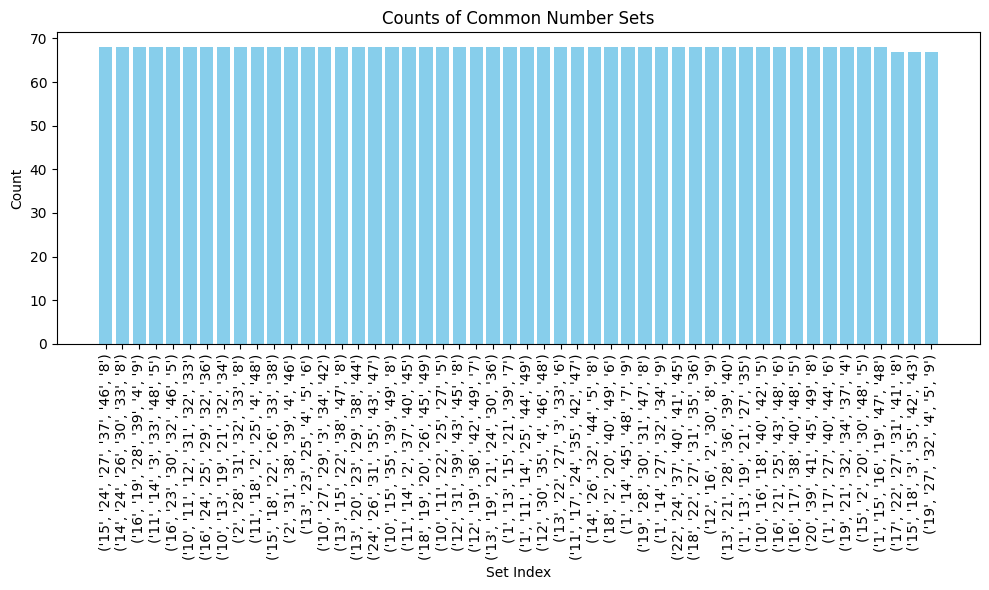

In [27]:
sets_df = data[:50]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(sets_df)), sets_df['Count'], color='skyblue')
plt.xlabel('Set Index')
plt.ylabel('Count')
plt.title('Counts of Common Number Sets')
plt.xticks(range(len(sets_df)), sets_df['Set'], rotation=90)
plt.tight_layout()
plt.show()